First, we need to add the package to the Python path to import and use it.

In [1]:
import sys, os.path
sys.path.append(os.path.expanduser("~/Repositories/erds"))  # adjust this path

Now we import the `Erds` class and `loadmat` to load data stored in a .mat file. We will also need `numpy` later on.

In [2]:
import numpy as np
from scipy.io import loadmat
from erds import Erds

Next, we load the example data set and store the EEG signals in `X` and the associated labels in `y`.

In [3]:
data = loadmat("test.mat")
X = data["X"]
y = data["y"].squeeze()

In [4]:
X.shape

(100, 3, 4096)

The data comprises 100 epochs with 3 channels (Laplacians at C3, Cz, and C4) and 4096 samples. The sampling rate is 512 Hz, so each epoch is 8 s long.

In [5]:
np.unique(y)

array([0, 1], dtype=uint8)

Each epoch is associated with one out of two labels. The data was recorded during a motor imagery task, where the subject imagined right hand movement (corresponding to a label of 0) and left hand movement (corresponding to a label of 1), respectively.

Since the data is already in the correct format (epochs, channels, samples), we are ready to compute ERDS maps. After creating an `Erds` object, we call its `fit` method and supply data from class 0. We also specifiy the sampling frequency. Otherwise, we're happy with the default values.

In [6]:
maps = Erds()
maps.fit(X[y == 0, :, :], fs=512)

<Erds object>
  n_times: 128
  n_freqs: 513
  baseline: whole epoch
  fs: 512 Hz
  Input data:
    epochs: 50
    channels: 3
    length: 4096 samples
  ERDS data:
    frequency bins: 513
    channels: 3
    length: 128 samples

After calculating the maps, we are presented with some basic features of our `Erds` object. For example, we see that each ERDS map consists of 513 frequency bins (which are always computed from 0 Hz up to the Nyquist frequency, which is 256 Hz in our example) and 128 time points (equally spaced across the whole epoch from 0 s to 8 s).

Our baseline for the ERDS values is the whole epoch since we didn't explicitly specify a baseline.

Finally, we get a quick overview of the shapes of the input EEG data (50, 3, 4096) and the resulting ERDS maps data (513, 3, 128).

We are now ready to plot the maps by simply calling the `plot` method. Again, we do not specify any arguments and therefore use the defaults.

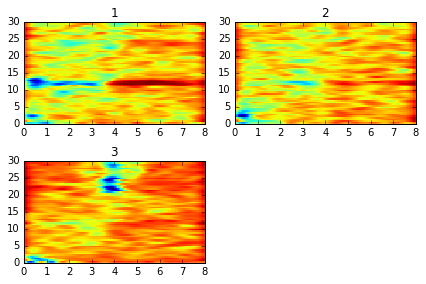

In [7]:
%matplotlib inline
maps.plot()